In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# STA365 Homework 2
### Sizhang Lyu

### Part I

$$\exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\ = \exp[-\frac{1}{2}(\sum_{i=1}^n\phi(x_i^2-2x_i\theta+\theta^2)+\tau(\theta^2-2\theta\theta_0+\theta_0^2))] \\ = \exp[-\frac{1}{2}(\phi\sum_{i=1}^n x_i^2-2\phi\theta\sum_{i=1}^nx_i+n\phi\theta^2+\tau\theta^2-2\tau\theta\theta_0+\tau\theta_0^2)] \\ = \exp[-\frac{1}{2}((\tau+n\phi)\theta^2-(2\tau\theta_0+2\phi\sum_{i=1}^n x_i)\theta+\phi\sum_{i=1}^n x_i^2+\tau\theta_0^2)] \\ = \exp[-\frac{1}{2}((\tau+n\phi)\theta^2-(\tau\theta_0+\phi\sum_{i=1}^n x_i)2\theta-2\tau\theta_0\phi\sum_{i=1}^n x_i+(\phi\sum_{i=1}^n x_i+\tau\theta_0)^2)] \\ \propto \exp[-\frac{1}{2}((\tau+n\phi)\theta^2-(\tau\theta_0+\phi\sum_{i=1}^n x_i)2\theta+(\phi\sum_{i=1}^n x_i+\tau\theta_0)^2)] \\ = \exp[-\frac{1}{2}(\tau+n\phi)(\theta-\frac{1}{\tau+n\phi}(\phi\sum_{i=1}^n x_i+\tau\theta_0))^2] \quad \blacksquare$$

### Part II

1. Here, instead of updating with the likelihood for all 3 data points at one time, we are updating the posterior sequentially using only one data point at a time.

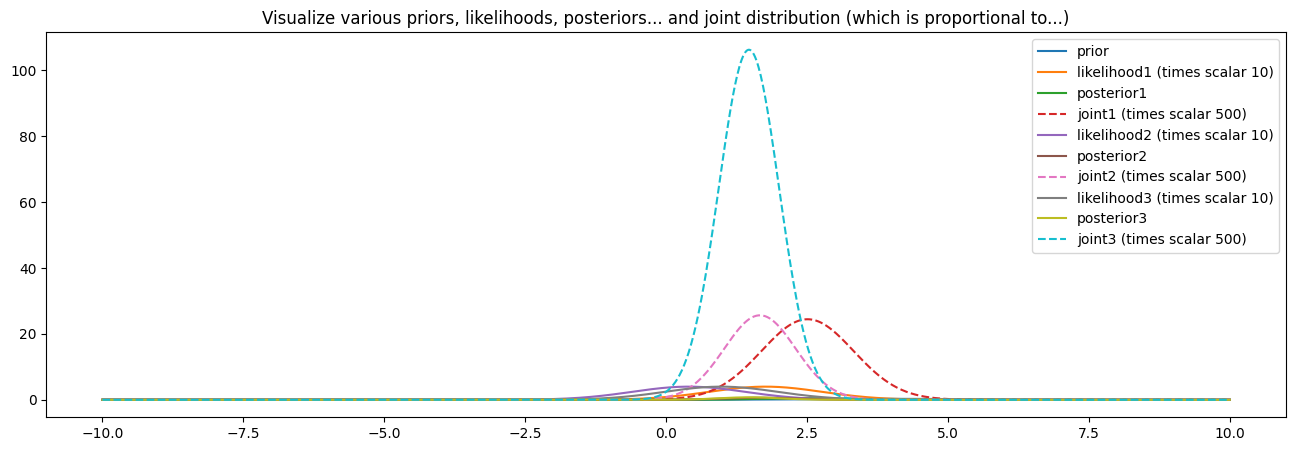

In [ ]:
np.random.seed(0)
n, theta_0, tau = 3, 4, 1/2
x = stats.norm(loc = 0, scale = 1).rvs(n)
parameter_domain = np.linspace(-10, 10, 1001)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c, c2 = 500, 10
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, prior, label="prior")
i = 1
for xi in x:
  likelihood = stats.norm.pdf(xi * np.ones(parameter_domain.shape), loc = parameter_domain, scale = 1)
  joint = c * likelihood * prior
  theta_0 = (tau * theta_0 + xi) / (tau + 1)
  tau += 1
  posterior = stats.norm(loc = theta_0, scale = 1 / tau ** 0.5).pdf(parameter_domain)
  plt.plot(parameter_domain, c2*likelihood, label="likelihood"+str(i)+" (times scalar "+str(c2)+")")
  plt.plot(parameter_domain, posterior, label="posterior"+str(i))
  plt.plot(parameter_domain, joint, linestyle="--", label="joint"+str(i)+" (times scalar "+str(c)+")")
  prior = posterior
  i += 1
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.show()

2. Here we are visualizing the normal-normal model on a log scale for a better visualization. Note that I actually changed the hyperparameter $\tau$ for the prior to make sure the prior, likelihood, and the log of the joint distrivution are on the same scale.

Text(0.5, 1.0, 'Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)')

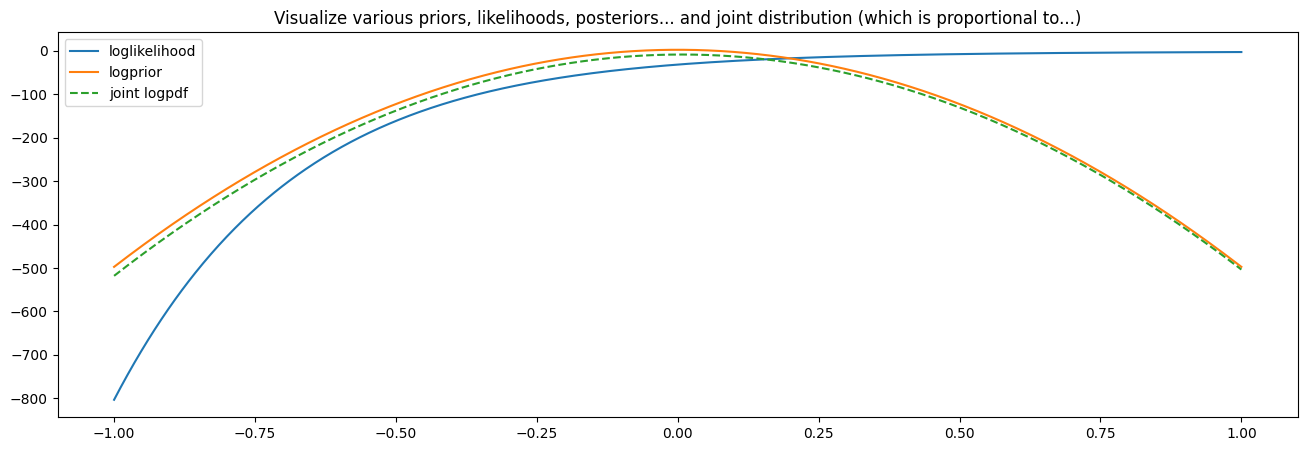

In [ ]:
np.random.seed(0)
n, theta_0, tau = 5, 0, 1000
x = stats.norm(loc = 0, scale = 1).rvs(n)
parameter_domain = np.linspace(-1, 1, 1001)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c, c2 = 500, 10
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
loglikelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
joint = likelihood * prior
logjoint = np.log(joint)
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, loglikelihood, label="loglikelihood")
# plt.plot(parameter_domain, c2 * likelihood, label="likelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, logprior, label="logprior")
# plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, logjoint, linestyle="--", label="joint logpdf")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

3. Here we are imposing a flat prior $p(\theta)=1$, and as we can see from the graph, the joint is actually the same as the likelihood. This is expected because the joint distribuiton $p(\theta)L(\theta)=1\times L(\theta)=L(\theta)$, and hence the posterior $p(\theta|x)=p(\theta)L(\theta)/p(x)=L(\theta)/\int p(\theta)L(\theta)d\theta=L(\theta)/\int L(\theta)d\theta$. And similarly, we will suspect the posterior $p(\theta|x)=\frac{c}{\int cL(\theta)}L(\theta)=L(\theta)/\int L(\theta)d\theta$ as well for $p(\theta)=c, \forall c\in \mathbb{R}$ prior.

Text(0.5, 1.0, 'Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)')

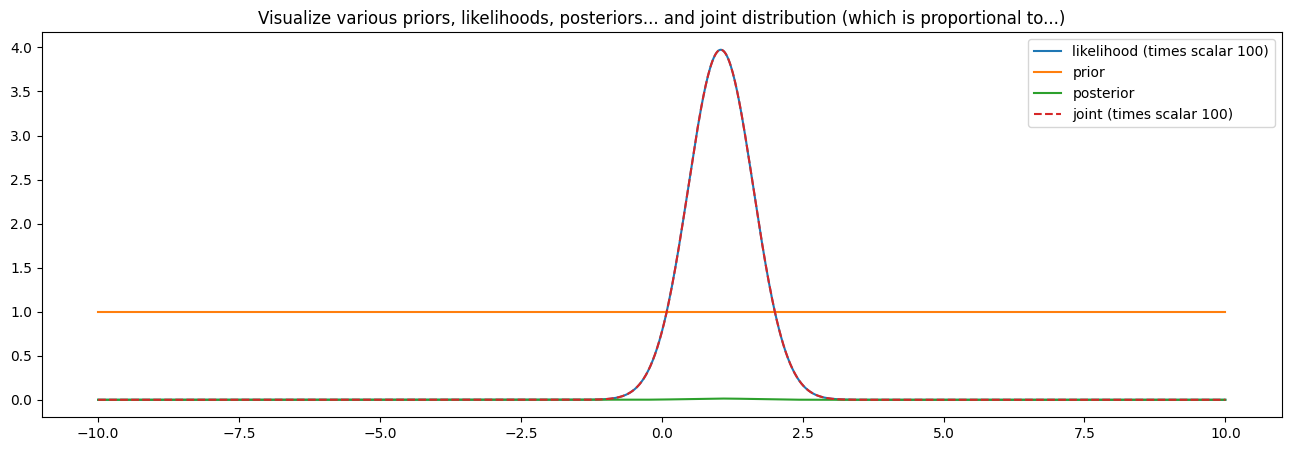

In [ ]:
np.random.seed(0)
n, theta_0, tau = 3, 4, 1/2
x = stats.norm(loc = 0, scale = 1).rvs(n)
parameter_domain = np.linspace(-10, 10, 1001)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c, c2 = 500, 100
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
jeffery_prior = lambda x: np.sqrt(1. / x)
flat_prior = lambda x: np.ones(x.shape)
prior = flat_prior(parameter_domain)
joint = likelihood * prior * c2
posterior = joint / sum(joint)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2 * likelihood, label="likelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c2)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

4. As we showed in the previous question, if we impose an improper prior, the the posterior is actually the likelihood divided by the marginal likelihood constant.